# FastAPI

---


## Some notes first

- you should really stop using pip and start using uv (uv is a pip alternative, please go and watch: https://youtu.be/AMdG7IjgSPM?si=2NCbkP6E1kPtUVfB)
- Once you have uv isntalled and working, you can hit the following commands easily:
  - uv init <foldername> (init command initializes a python/uv project in the folder)
  - uv add 'fastapi[standard]' (this is the same as pip install fastapi)


## Some basics before starting

- The goal we are trying to achieve here is simple. We have to setup a url/endpoint that the frontend (javascript or typescript) can hit with fetch or axios to make requests, like a GET or POST or anything like that
- Here is some simple code for the frontend, this is kinda like that code that the frontend engineer will be writing:


In [ ]:
async function getData(): Promise<void> {
    try {
        const response = await fetch("http://127.0.0.1:8000/getdata")
        if (!response.ok) {
            return 
            // throw some error
        }
        const data = await response.json()
        console.log(data)
        // now here we will do something with the data, probably use a setState function to set it in a state
    } catch (e) {
        console.log(`yo we got some error ma dawg: ${e}`)
    }
}

- now, where does that http//:localhost:8000/getdata come from? Well, we basically create that endpoint using fastapi


## **Setup app and simple endpoint**


In [1]:
# step 1: create a fastapi application with the FastAPI constructor
from fastapi import FastAPI

app = FastAPI()

In [2]:
# step 2: we setup an endpoint using decorators, you don't need to learn what decorators are or how they work, just use this code simply:

# this creates the default route, if you visit localhost:8000 now, you will have the following dictionary returning
@app.get("/") 
def get_data():
    return {"hello there": "yo yo mate, whats popping. this is the default route"}

@app.get("/getdata")
def getdata():
    return {
        "id": 12705,
        "childName": "Junaid",
        "childHeartRate": 467
    }

- lets try to breakdown step 2 further:
  - 1. we use @app.get or @app.post or whatever decorator to make a new endpoint
  - 2. we then define a function under the decorator that does something (returns some data, receive some data, etc etc)
  - 3. Its convention to return a dictionary from these endpoint functions because python dictionaries map nicely to JSON and also typescript types on the frontend. Later we will learn about pydantic data models which map even more perfectly to the frontend typescript types
- lets see the output


#### Note:

- you run fastapi code in .py files, not .ipynb files. So make sure to make a .py file and write the code in that.
- you can hit uv run fastapi dev <filename> to run the code.
- once running, you will see something like this in the terminal:

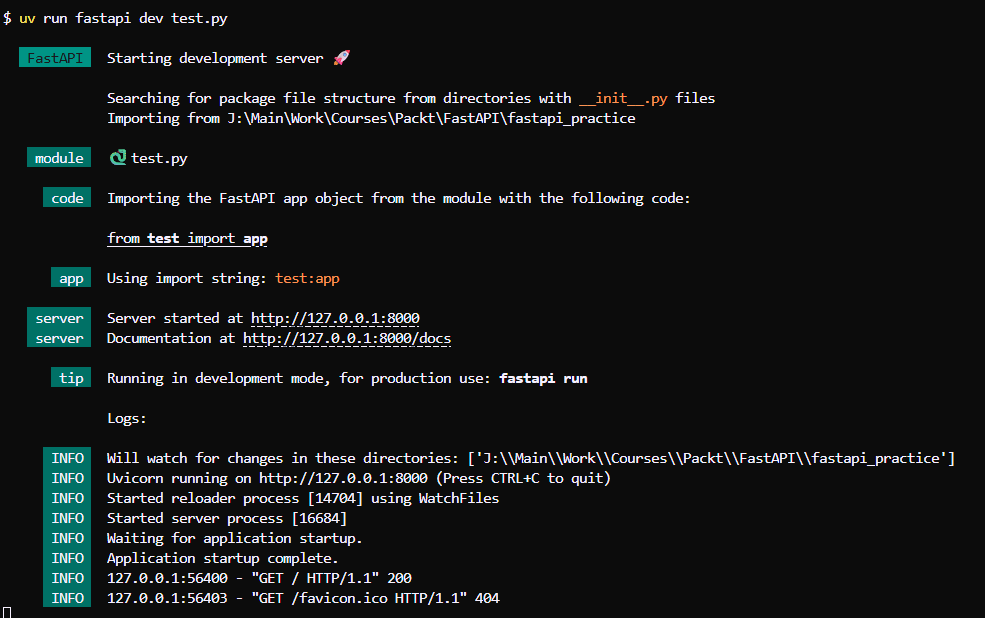

- visit http://127.0.0.1:8000 and you will see:

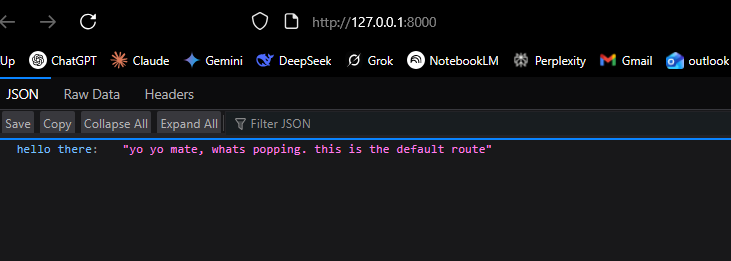

- we can see the dictionary we returned.
- visit the secondd endpoint we made at http://127.0.0.1:8000/getdata and we will see:

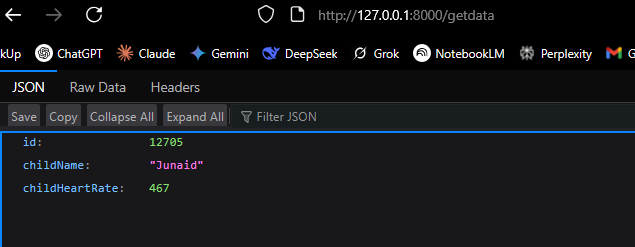


- That is the core and simplest concept, we make endpoints, we send or receive data from those endpoints or do many other things as well.
- now lets cover someother basics:
  - how to receive data on an endpoint
  - how to make parameterized endpoints
  - how to view documentation


## **Viewing and testing our endpoint**

- you can visit http://127.0.0.1:8000/docs and you will see:

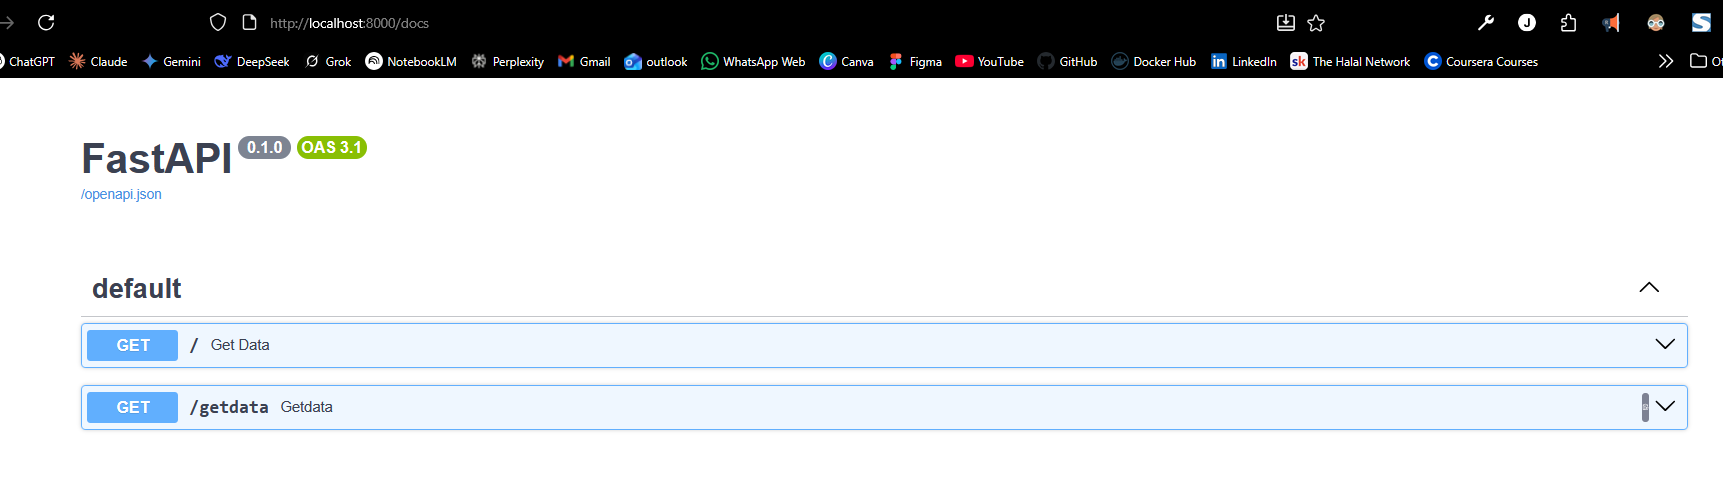

- This is an auto generated documentation page where one can view and test out the api endpoint we just created. The frontend engineer should first use this and test it out and see if everything works well, then they should write the frontend code to hit the endpoints.

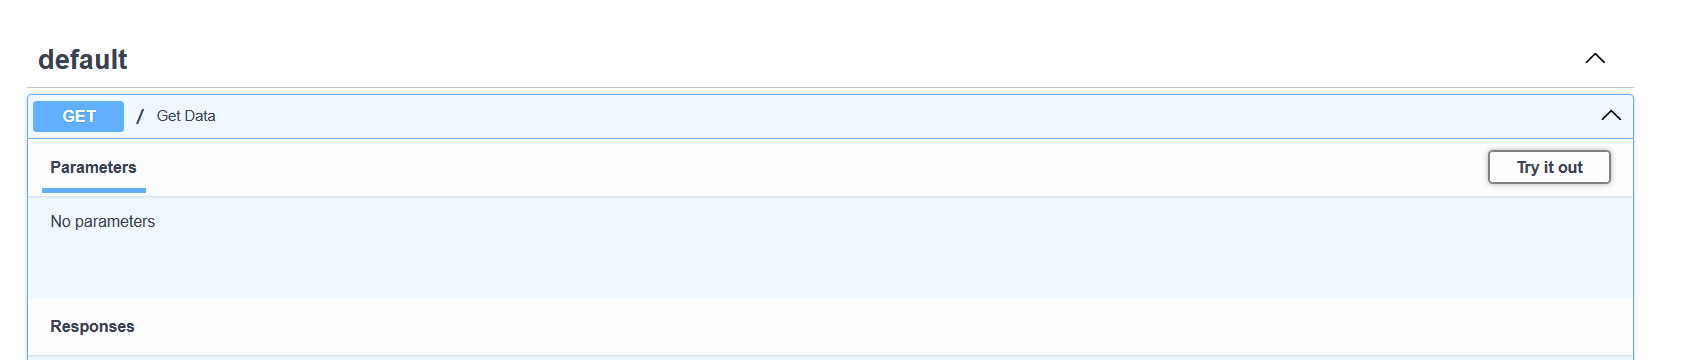

- we can press the try it out button to test the endpoint and see output and manipulate parameters etc


## **create a parameterized route**

- lets say the frontend wants to view the data of a specific child


In [3]:
# some dummy data
db = {
    12701: {
        "weight": 3.5,
        "content": "furniture",
        "status": "in transit"
    },
    12702: {
        "weight": 1.2,
        "content": "books",
        "status": "delivered"
    },
    12703: {
        "weight": 7.8,
        "content": "electronics",
        "status": "pending"
    },
    12704: {
        "weight": 2.0,
        "content": "clothes",
        "status": "in transit"
    },
    12705: {
        "weight": 5.5,
        "content": "appliances",
        "status": "shipped"
    },
    12706: {
        "weight": 0.9,
        "content": "toys",
        "status": "delivered"
    }
}

In [ ]:
from fastapi import HTTPException, status
@app.get("/getdata/{id}")
def getdata_by_id(id: int):
    # some code to fetch that exact child by id from the database. but since our "db" is just the dict above, we can do this:
    if id not in db:
        raise HTTPException(
            status_code=status.HTTP_404_NOT_FOUND,
            detail="Given id does not exist"
        )
    return db[id]

- Lets review:
  - 1. we use {} in the decorator to create a dynamic endpoint
  - 2. we receive that dynamic part of the endpoint into our function by having parameter in the function with the same name.
  - 3. the : int is type annotation that enforces the type of data
  - 4. we return a proper http error if the id does not exist
  - 5. we return the data if everything goes fine

- we can now visit http://127.0.0.1:8000/docs again after saving the code and we will see:

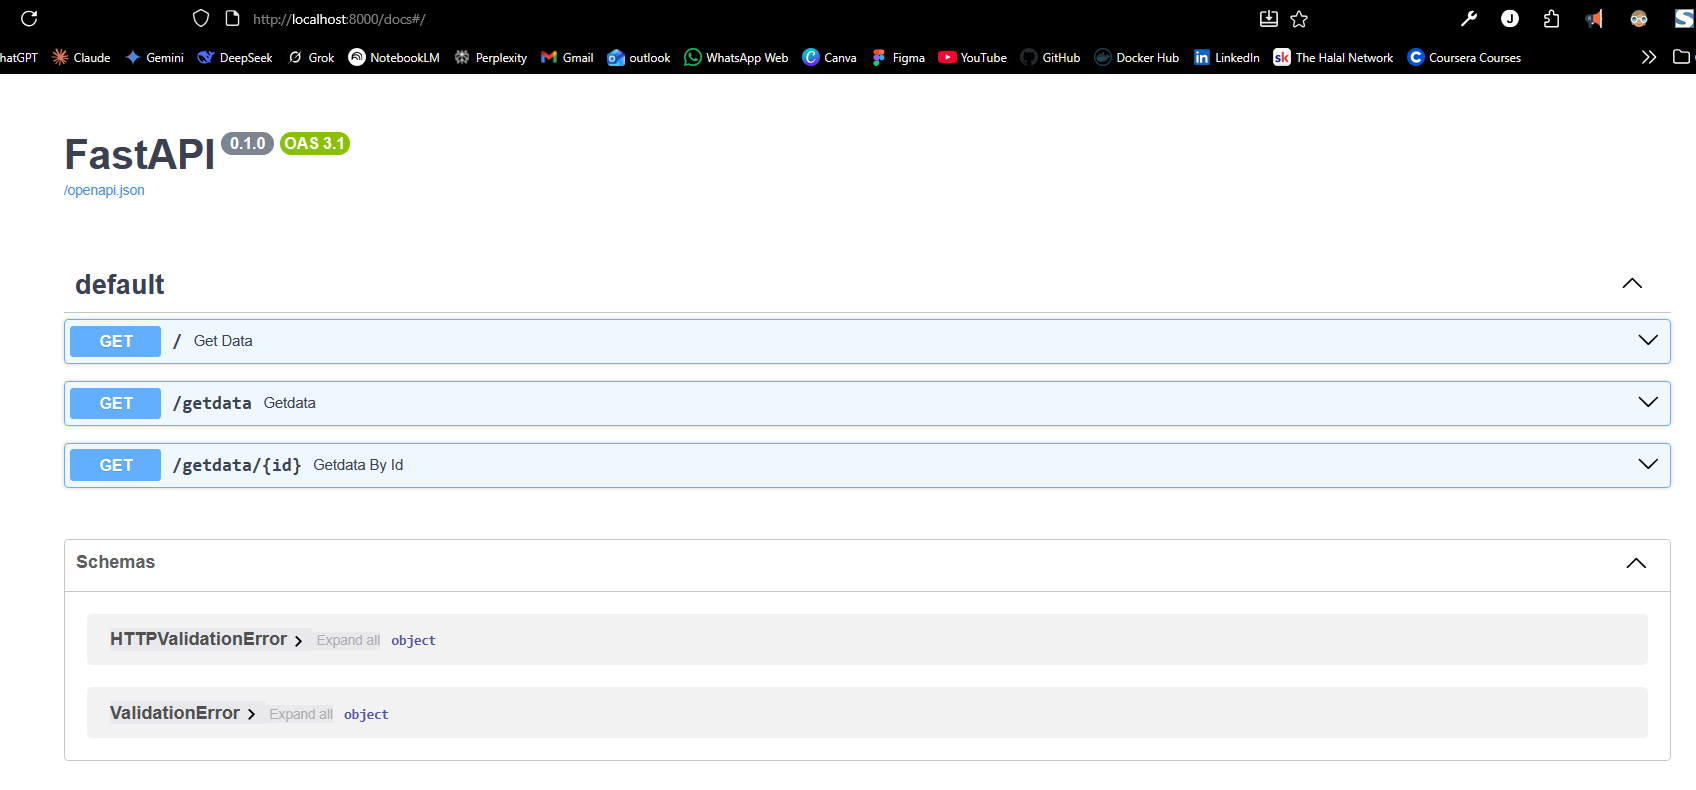


- there is a third new get endpoint at /getdata/{id}. we can of course test it out in the documentation with the try it out button. or we could just visit it directly:


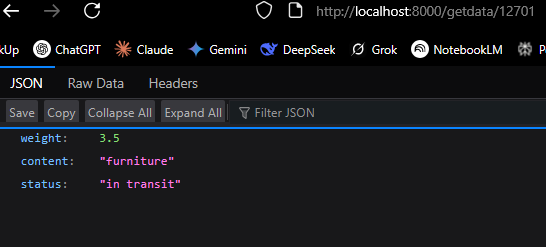

- if we visit an id that does not exist. it returns a proper error:

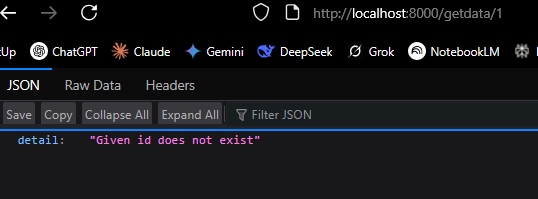